In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import imutils
import math
from matplotlib.colors import ListedColormap
df = pd.read_csv("idk_final.csv")
g_features = []
g_target = []
count  = 0
count_g = 0
count_o = 0

for i in range(len(df["diameter"])):
    
    #g_features.append([df["diameter"][i],df["area"][i],df["radius"][i]])
    if df["status"][i] == 0:
        if count_g < 842 :
            g_target.append(1)
            g_features.append([df["diameter"][i],df["radius"][i]])
            count_g = count_g + 1
    
    elif df["status"][i] == 1 :
        if count < 650 :
            g_target.append(0)
            g_features.append([df["diameter"][i],df["radius"][i]])
            count = count + 1
    
    elif df["status"][i] == 2 :
        if count_o < 150 :
            g_target.append(0)
            g_features.append([df["diameter"][i],df["radius"][i]])
            count_o = count_o + 1
            
    
print(f'Select: {len(g_features)} set')
g_features = np.array(g_features)
g_target = np.array(g_target)

Select: 1642 set


Automatically created module for IPython interactive environment
====================Fold 1==================== 

accuracy_score : 0.7984790874524715
log_loss : 0.4557777394707485

====================Fold 2==================== 

accuracy_score : 0.7756653992395437
log_loss : 0.5065259469649674

====================Fold 3==================== 

accuracy_score : 0.8326996197718631
log_loss : 0.4123406209848692

====================Fold 4==================== 

accuracy_score : 0.7709923664122137
log_loss : 0.4880695614527765

====================Fold 5==================== 

accuracy_score : 0.8129770992366412
log_loss : 0.44550496337734974



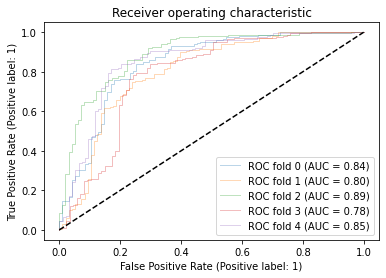

accuracy : 0.7416413373860182
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.85      0.54      0.66        95
           1       0.78      0.95      0.86       168

    accuracy                           0.80       263
   macro avg       0.82      0.74      0.76       263
weighted avg       0.81      0.80      0.79       263

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.78      0.53      0.63        96
           1       0.77      0.92      0.84       167

    accuracy                           0.78       263
   macro avg       0.78      0.72      0.74       263
weighted avg       0.78      0.78      0.76       263

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.85      0.68      0.75        99
           1       0.83      0.93   

In [4]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt
import pickle

from sklearn import svm
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold


# Import some data 
X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,shuffle=True)


classifier = svm.SVC(probability=True)
history = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    
    
    # Fit model
    classifier.fit(X_train, y_train)
    
    
    # Save model
    with open('Models\\glaucoma_models\\svm_glaucoma', 'wb') as f:
        pickle.dump(classifier, f)
    
    
    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)
    
    
    # Store model report in history list
    history.append(classification_report(y_val,predict))
    
    
    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================','\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    
ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('Graph\\glaucoma\\svm_glaucoma_graph.jpg')
plt.show()


predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.86      0.56      0.68       160
           1       0.69      0.91      0.78       169

    accuracy                           0.74       329
   macro avg       0.77      0.74      0.73       329
weighted avg       0.77      0.74      0.73       329

0.7416413373860182


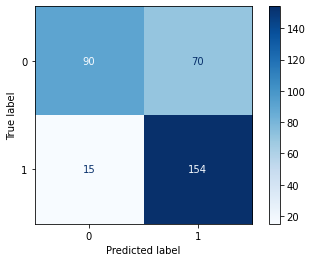

In [5]:
from sklearn.metrics import plot_confusion_matrix


# Report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))


# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.savefig('Matrix\\glaucoma\\svm_glaucoma_matrix.jpg')

Automatically created module for IPython interactive environment
=========================Fold 1=========================
accuracy_score : 0.7566539923954373
log_loss : 2.0151423653662426

=========================Fold 2=========================
accuracy_score : 0.7870722433460076
log_loss : 1.9966420562510414

=========================Fold 3=========================
accuracy_score : 0.7718631178707225
log_loss : 3.5137297510368772

=========================Fold 4=========================
accuracy_score : 0.7748091603053435
log_loss : 2.1402833949526814

=========================Fold 5=========================
accuracy_score : 0.7786259541984732
log_loss : 2.626810936169445



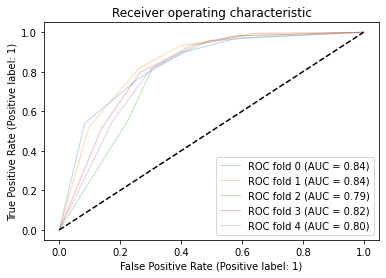

accuracy : 0.78419452887538
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.65      0.74      0.69        96
           1       0.84      0.77      0.80       167

    accuracy                           0.76       263
   macro avg       0.74      0.75      0.74       263
weighted avg       0.77      0.76      0.76       263

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       103
           1       0.83      0.82      0.82       160

    accuracy                           0.79       263
   macro avg       0.78      0.78      0.78       263
weighted avg       0.79      0.79      0.79       263

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        98
           1       0.82      0.82     

In [6]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


# Import some data to play with
X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,shuffle=True)


classifier = KNeighborsClassifier(n_neighbors=4)
history = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    
    
    # Fit model
    classifier.fit(X_train, y_train)
    
    
    # Save model
    with open('Models\\glaucoma_models\\knn_normal', 'wb') as f:
        pickle.dump(classifier, f)
    
    
    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)
    
    
    # Store model report in history list
    history.append(classification_report(y_val,predict))
    
    
    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'=========================Fold {i+1}=========================')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    
    
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    

ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('Graph\\glaucoma\\knn_glaucoma_graph.jpg')
plt.show()


predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       160
           1       0.77      0.83      0.80       169

    accuracy                           0.78       329
   macro avg       0.79      0.78      0.78       329
weighted avg       0.79      0.78      0.78       329

0.78419452887538


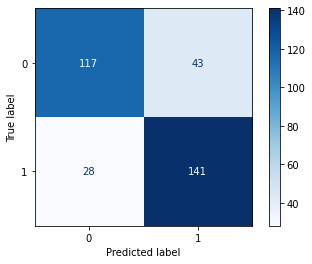

In [7]:
from sklearn.metrics import plot_confusion_matrix

# Report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.savefig('Matrix\\glaucoma\\knn_glaucoma_matrix.jpg')

Automatically created module for IPython interactive environment
=========================Fold 1=========================
accuracy_score : 0.8365019011406845
log_loss : 0.4366218732954666

=========================Fold 2=========================
accuracy_score : 0.8060836501901141
log_loss : 0.45940265359530963

=========================Fold 3=========================
accuracy_score : 0.8022813688212928
log_loss : 0.4380324785437758

=========================Fold 4=========================
accuracy_score : 0.7977099236641222
log_loss : 0.4675442327907422

=========================Fold 5=========================
accuracy_score : 0.7748091603053435
log_loss : 0.48621799668178145



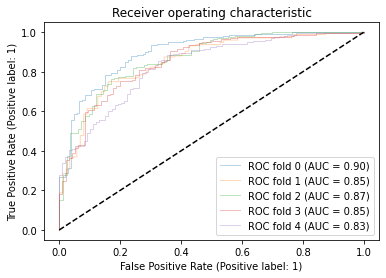

accuracy : 0.7477203647416414
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.87      0.70      0.77       106
           1       0.82      0.93      0.87       157

    accuracy                           0.84       263
   macro avg       0.85      0.81      0.82       263
weighted avg       0.84      0.84      0.83       263

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.80      0.55      0.65        87
           1       0.81      0.93      0.87       176

    accuracy                           0.81       263
   macro avg       0.80      0.74      0.76       263
weighted avg       0.81      0.81      0.80       263

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.71      0.64      0.67        83
           1       0.84      0.88   

In [8]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


# Import some data to play with
X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,shuffle=True)


classifier = LogisticRegression(random_state=random_state)
history = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    
    
    # Fit model
    classifier.fit(X_train, y_train)
    
    
    # Save model
    with open('Models\\glaucoma_models\\lg_glaucoma', 'wb') as f:
        pickle.dump(classifier, f)
    
    
    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)
    
    
    # Store model report in history list
    history.append(classification_report(y_val,predict))
    
    
    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'=========================Fold {i+1}=========================')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    
    
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    

ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('Graph\\glaucoma\\lg_glaucoma_graph.jpg')
plt.show()


predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.85      0.58      0.69       160
           1       0.70      0.91      0.79       169

    accuracy                           0.75       329
   macro avg       0.77      0.74      0.74       329
weighted avg       0.77      0.75      0.74       329

0.7477203647416414


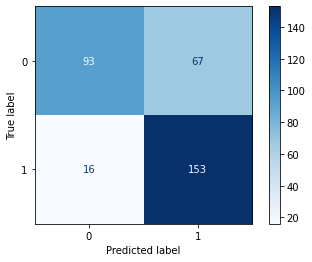

In [9]:
from sklearn.metrics import plot_confusion_matrix

# Report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.savefig('Matrix\\glaucoma\\lg_glaucoma_matrix.jpg')

Automatically created module for IPython interactive environment
=========================Fold 1=========================
accuracy_score : 0.7718631178707225
log_loss : 0.508818012229941

=========================Fold 2=========================
accuracy_score : 0.7832699619771863
log_loss : 0.4928351893719515

=========================Fold 3=========================
accuracy_score : 0.7490494296577946
log_loss : 0.5042325566282452

=========================Fold 4=========================
accuracy_score : 0.7709923664122137
log_loss : 0.44277421131397066

=========================Fold 5=========================
accuracy_score : 0.7748091603053435
log_loss : 0.48499068996027



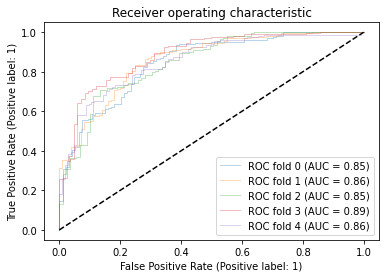

accuracy : 0.7325227963525835
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.67      0.72      0.69        94
           1       0.84      0.80      0.82       169

    accuracy                           0.77       263
   macro avg       0.75      0.76      0.76       263
weighted avg       0.78      0.77      0.77       263

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       100
           1       0.85      0.79      0.82       163

    accuracy                           0.78       263
   macro avg       0.77      0.78      0.78       263
weighted avg       0.79      0.78      0.79       263

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.60      0.78      0.68        89
           1       0.86      0.74   

In [10]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt
import pickle

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold


# Import some data to play with
X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,shuffle=True)


classifier = GaussianNB()
history = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    
    # Fit model
    classifier.fit(X_train, y_train)
    
    # Save model
    with open('Models\\glaucoma_models\\nb_glaucoma', 'wb') as f:
        pickle.dump(classifier, f)
        
    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)
    
    
    # Store model report in history list
    history.append(classification_report(y_val,predict))
    
    
    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'=========================Fold {i+1}=========================')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    
ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('Graph\\glaucoma\\nb_glaucoma_graph.jpg')
plt.show()


predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       160
           1       0.73      0.76      0.74       169

    accuracy                           0.73       329
   macro avg       0.73      0.73      0.73       329
weighted avg       0.73      0.73      0.73       329

0.7325227963525835


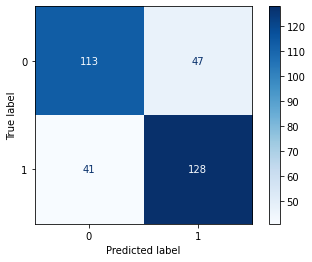

In [11]:
from sklearn.metrics import plot_confusion_matrix

# Report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.savefig('Matrix\\glaucoma\\nb_glaucoma_matrix.jpg')